# Librerias

In [1]:
%pip install --upgrade ISLP #para desicion tree clasifier

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=a4edeadc11dd79cfcf8091daf04722ae23b92cb3176ba6ffe44d69145792834e
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                 #todos
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score #REGRESION LOGISTICA
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler#SVM
from sklearn.metrics import confusion_matrix                #SVM y xgboost_lightgbm_catboost
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #metodo de clasificacion  #KNN

# sklearn
import sklearn.model_selection as skm
from sklearn.tree import (
    DecisionTreeClassifier as DTC, #modelo de arbol de decision como clasificador
    DecisionTreeRegressor as DTR,
    plot_tree,
    export_text
)                                                #ARBOLES DE DECISIÓN (DTC)
from sklearn.metrics import ( #metricas
    accuracy_score,
    log_loss
)

# ISLP
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS



# Exploracion datos

In [17]:
# Cargar el CSV
df = pd.read_csv("heart.csv")  # Cambia "heart.csv" si tu archivo tiene otro nombre
df.rename(columns={'HeartDisease': 'target'}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info() #10 variables, datos de 918 pacientes. Variables categóricas o numéricas (numeros enteros y con decimales), no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe() #caracteristicas de variables numericas
#la mayoria de los datos (75%) pertenecen a pacientes menores a 60 años, el colesterol tiene mayor dispersion y puede tener outliers, igual capaz no hace falta sacarlo los outliers no infieren mucho en modelos de machine learning?
#puedo probar entrenar modelos con y sin la variable de colesterol..igual es como la mas importante? --> igual no me preocupo demasiado porque siempre puedo escalar las variables numericas y fin

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
positivos = np.sum(df['target'])                 # Cantidad de positivos (1) --- los casos negativos no suman
total = np.size(df['target'])                    # Total de registros
negativos = total - positivos              # Cantidad de negativos (0)

print('Porcentaje de positivos: {:.2f}%'.format(100 * positivos / total))
print('Porcentaje de negativos: {:.2f}%'.format(100 * negativos / total)) #están bastante balanceados

Porcentaje de positivos: 55.34%
Porcentaje de negativos: 44.66%


In [ ]:
categorical_columnas= df.select_dtypes(include="object")
print(categorical_columnas)

    Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]


In [ ]:
df.columns.difference(categorical_columnas) #esto pide las columnas dentro de df que NO esten en categorical_columns
print(df.columns.difference)

<bound method Index.difference of Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'target'],
      dtype='object')>


In [ ]:
sns.set_style('whitegrid')
df_sorted = df.sort_values(by='target')
sns.pairplot(
    df_sorted[df_sorted.columns.difference(categorical_columns)],
    diag_kind='kde',
    hue='target',
    corner=True,
    kind='scatter',
    diag_kws=dict(common_norm=False)
)

#seaborn = libreria para la visualizacion de datos

NameError: name 'categorical_columns' is not defined

Por si quiero ver las categóricas en mas detalle

In [ ]:
# Variables categóricas: conteo y porcentaje
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    print(f"\n{col} - Categorías: {df[col].nunique()}")
    print(df[col].value_counts())
    print((df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%')


Sex - Categorías: 2
Sex
M    725
F    193
Name: count, dtype: int64
Sex
M    78.98%
F    21.02%
Name: proportion, dtype: object

ChestPainType - Categorías: 4
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
ChestPainType
ASY    54.03%
NAP    22.11%
ATA    18.85%
TA      5.01%
Name: proportion, dtype: object

RestingECG - Categorías: 3
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
RestingECG
Normal    60.13%
LVH       20.48%
ST        19.39%
Name: proportion, dtype: object

ExerciseAngina - Categorías: 2
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ExerciseAngina
N    59.59%
Y    40.41%
Name: proportion, dtype: object

ST_Slope - Categorías: 3
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
ST_Slope
Flat    50.11%
Up      43.03%
Down     6.86%
Name: proportion, dtype: object


# Modelos


Primero OHE y despues escalado (la funcion scaler en los datos de entrenamiento con las variables booleanas) --- te sirve para *casi* todos los modelos.

Para CatBoost hay que volver a escalar (scaler en los datos de entrenamiento con las variables originales) el df original

ONE HOT ENCODING (OHE) --- Feature engineering

Para poder meter la info de las variables categóricas en el algoritmo, tengo que pasarlos a variables booleanas (las vuelvo numericas)


In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True) #categoria booleana a todas las categorias, se saca la primera para evitar la multicolinealidad, la ultima categoria se saca por deducción teniendo en cuenta los valores de las demas categorias.
                                                # si originalmente son 12 categorias (meses del año por ej), para un modelo me sirve febrero en adelante, porque si esas 11 tienen valor 0 quiere decir que es enero, si tmb agrego enero le estoy dando info redundante

No se pierden datos con drop_first=True.
Lo que hacés es elegir una categoría de referencia (la eliminada), y las demás columnas se interpretan en relación a ella.

In [ ]:
print(df_dummies.dtypes)

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
target                 int64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object


In [ ]:
df_dummies.shape #se agrgaron 6 variables más

(918, 16)

In [ ]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1) #saco target de x

Escalo las variables numericas no binarias - sin la variable target porque si no le estas dando al modelo la media de todos los datos

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True


In [ ]:
print(X.dtypes)

Age                  float64
RestingBP            float64
Cholesterol          float64
FastingBS              int64
MaxHR                float64
Oldpeak              float64
Sex_M                   bool
ChestPainType_ATA       bool
ChestPainType_NAP       bool
ChestPainType_TA        bool
RestingECG_Normal       bool
RestingECG_ST           bool
ExerciseAngina_Y        bool
ST_Slope_Flat           bool
ST_Slope_Up             bool
dtype: object


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #70 entrenamiento, 30 de prueba --- tengo q poner numero de semilla, puede ser cualquier nro entero. 42 puso el profe unidad 5
#random_state garantiza reproducibilidad. Si alguien más corre tu código con la misma semilla, obtendrá exactamente la misma división de datos. -- es para la aleatoridad de división de datos en entrenamiento y prueba

# KNN

Usa variables booleanas

Precisión con k = 1: 0.84
Precisión con k = 3: 0.86
Precisión con k = 5: 0.87
Precisión con k = 7: 0.89
Precisión con k = 9: 0.89
Precisión con k = 11: 0.90


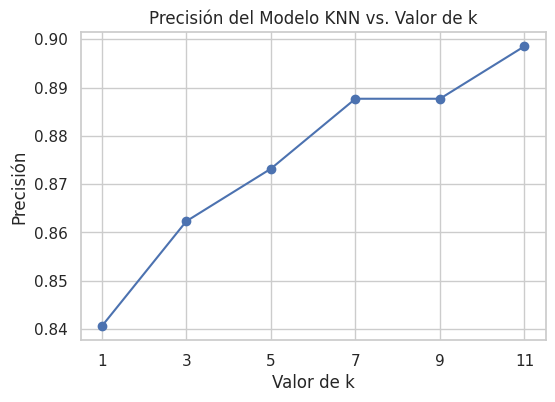

In [ ]:
# Probar con diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []

for k_val in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracies.append(accuracy)
    print(f"Precisión con k = {k_val}: {accuracy:.2f}")

# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Precisión del Modelo KNN vs. Valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Precisión')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Validacion cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
k_values = range(1, 12, 2) # Probar k de 1 a 11 (impares)
accuracies_cv = []

for k_val in k_values:
    knn = KNeighborsClassifier(n_neighbors=k_val)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies_cv.append(scores.mean()) # Guardar la media de las puntuaciones de CV

# Ahora comparas las accuracies_cv para encontrar el mejor k
best_k_cv = k_values[np.argmax(accuracies_cv)]
print(f"Mejor k (con CV en el conjunto de entrenamiento): {best_k_cv}")

Mejor k (con CV en el conjunto de entrenamiento): 7


------

Pruebo con k = 11

In [ ]:
k = 11 #defino el valor de k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn_classifier.fit(X_train, y_train)

print(f"Modelo KNN entrenado con k = {k}")

Modelo KNN entrenado con k = 11


In [ ]:
y_pred = knn_classifier.predict(X_test)

Precisión del modelo KNN (k=11): 0.90

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       123
           1       0.89      0.93      0.91       153

    accuracy                           0.90       276
   macro avg       0.90      0.89      0.90       276
weighted avg       0.90      0.90      0.90       276



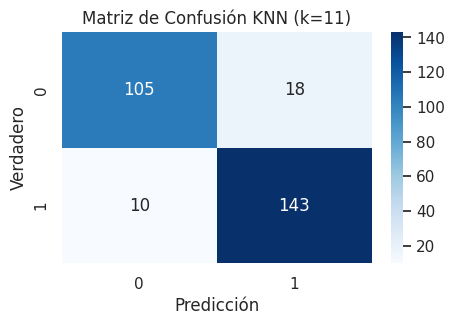

In [ ]:
target_names = ['0','1']

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo KNN (k={k}): {accuracy:.2f}")

# Mostrar un informe de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Mostrar la matriz de confusión
# print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
# print(cm)

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title(f'Matriz de Confusión KNN (k={k})')
plt.show()


# Regresión Logística

no correr si no hace falta es para tenerlo a mano

In [ ]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1) #saco target de x

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) #70 entrenamiento, 30 de prueba

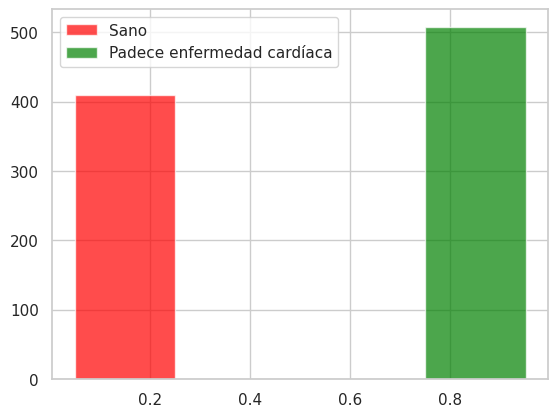

In [ ]:
labels = ['Sano','Padece enfermedad cardíaca']
colors = ['red','green']
y_train_no = y[y==0]
y_train_si = y[y==1]
plt.hist([y_train_no,y_train_si],label=labels,color=colors,alpha=0.7, bins=2)
plt.legend()
plt.show()

In [ ]:
# Crear una instancia del modelo de Regresión Logística
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
##EVALUACION

# Hacer predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Calcular la probabilidad de las predicciones
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] # Probabilidad de la clase '1'

# Mostrar algunas predicciones y sus probabilidades
results_df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred, 'Probabilidad_EnfCardiaca': y_pred_proba})

# Redondear la columna 'Probabilidad_EnfCardiaca' a 4 decimales
results_df['Probabilidad_EnfCardiaca'] = results_df['Probabilidad_EnfCardiaca'].round(4)

print("Ejemplos de Predicciones:")
print(results_df.head(10))
print("\n" + "="*50 + "\n")

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

Ejemplos de Predicciones:
     Real  Predicho  Probabilidad_EnfCardiaca
351     1         1                    0.7083
596     1         1                    0.8667
491     1         1                    0.9412
794     0         0                    0.0551
544     0         0                    0.1760
651     1         1                    0.7031
132     1         1                    0.8837
117     1         1                    0.8976
751     0         0                    0.0146
627     0         0                    0.0565


Accuracy del modelo: 0.8841


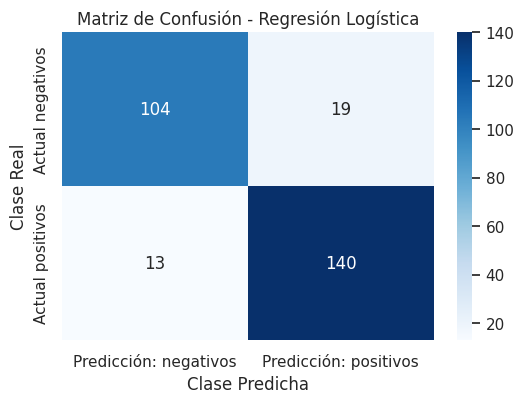

In [ ]:
#MATRIZ DE CONFUSION

conf_matrix = confusion_matrix(y_test, y_pred)
# print("Matriz de Confusión:")
# print(conf_matrix)

reglog = plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción: negativos', 'Predicción: positivos'],
            yticklabels=['Actual negativos', 'Actual positivos'])
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm) #bastante bien, tiene un poco de error tipo 2 (falso negativo) y aun menos de tipo 1 (falso positivo)

[[104  19]
 [ 13 140]]


In [ ]:
cm = confusion_matrix(y_test, y_pred) #metricas para evaluar como performeo el modelo
accuracy = round(accuracy_score(y_test,y_pred) ,4)
error_rate = round(1-accuracy,4)
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
f1score = round(f1_score(y_test,y_pred),2)
cm_labled = pd.DataFrame(cm, index=['Actual : negativos ','Actual : positivos'], columns=['Predicción : negativos','Predict :positivos '])

print("-----------------------------------------")
print("Resultados")
print('Accuracy  = {}'.format(accuracy))
print('Error_rate  = {}'.format(error_rate))
print('Precision = {}'.format(precision))
print('Recall    = {}'.format(recall))
print('f1_score  = {}'.format(f1score))
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred_proba):.3f}")
print("-----------------------------------------")
# return cm_labled # This line is commented out as it's not needed in this context

-----------------------------------------
Resultados
Accuracy  = 0.8841
Error_rate  = 0.1159
Precision = 0.88
Recall    = 0.92
f1_score  = 0.9
ROC-AUC  : 0.935
-----------------------------------------


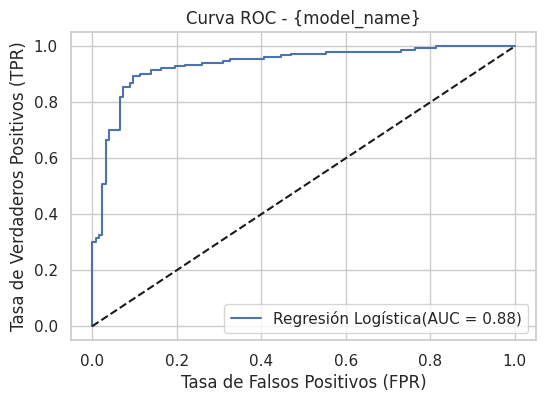

In [ ]:
#Curva ROC -- me da error pero no entiendo porqué
model_name = 'Regresión Logística'
roc_auc = roc_auc_score (y_test, y_pred)
fpr, tpr, thresholds = roc_curve (y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr,tpr, label=f'{model_name}(AUC = {roc_auc:.2f})') #tiene una formad distinta de medir el AUC ? - es mejor el de arriba
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - {model_name}')
plt.legend(loc='lower right')
plt.show()

#está en la esquina superior izquierda - ok

# SVM

no correr si no hace falta - es solo para tenerlo a mano

In [ ]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1) #saco target de x

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Primero tengo que definir los hiperparámetros

In [ ]:
#para ver cual es el mejor pre ajuste que se puede hacer
#pongo en formato diccionario los hiperparámetros que quiero probar

my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['rbf']} #rbf Radial Basis Function, el que funciona mejor
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
#acá prueba las combinaciones de hiperparametros
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid.best_params_ # scale = te saca un numero de gamma optimo en función de las features (es una operacion matematica)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, gamma=0.001)

In [ ]:
#esta funcion es para entrenar el modelo y que pueda predecir
def my_SVM_report(X_train, y_train, X_test,y_test, C=100,gamma=0.001 ,kernel='rbf'):

    train_set_count = X_train.shape[0]
    test_set_count = X_test.shape[0]
    positivos = np.sum(y_train)
    total = np.size(y_train)

    svc= SVC(C=C, gamma=gamma, kernel=kernel, probability = True) #especifico los parámetros ;(AUC) Si pones probability=True, el modelo podrá generar probabilidades de pertenencia a cada clase
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)

    cm = confusion_matrix(y_test, y_hat) #metricas para evaluar como performeo el modelo
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negativos ','Actual : positivos'], columns=['Predicción : negativos','Predict :positivos '])
    y_prob= svc.predict_proba(X_test)[:,1] #predict_proba(X_test_enc) devuelve un array de probabilidades para cada clase de cada ejemplo del conjunto de prueba.


    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(train_set_count))
    print('Tamaño test: {}'.format(test_set_count))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * positivos / total))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")
    print("-----------------------------------------")
    return cm_labled


-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8913
Error_rate  = 0.1087
Precision = 0.89
Recall    = 0.92
f1_score  = 0.9
ROC-AUC  : 0.939
-----------------------------------------


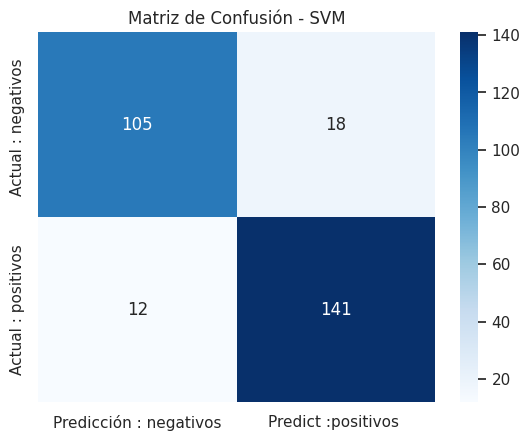

In [ ]:
cm = my_SVM_report(X_train, y_train, X_test,y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matriz de Confusión - SVM")
plt.show()

#recall = la cantidad de true positive sobre los (positivos + falsos negativos) --> cuantos positivos reales hay dentro de todos los positivos segun el modelo

In [ ]:
#por si quiero probar otro valor de gamma
my_SVM_report(X_train, y_train, X_test,y_test,C=100, gamma="scale")

-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8587
Error_rate  = 0.1413
Precision = 0.89
Recall    = 0.85
f1_score  = 0.87
-----------------------------------------


,Predicción : negativos,Predict :positivos
Actual : negativos,107,16
Actual : positivos,23,130


# Arboles de decision

## Decision tree clasifier

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [18]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [19]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
# de 0 a 1 paso a Yes y No -- esto se crea aparte, no forma parte de df_dummies
High = np.where(
    df_dummies.target == 1,
    "Yes",
    "No"
)

In [53]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,target,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [55]:
# se usa MS para preparar el dataset para poder ser consumido por el modelo
model = MS(df_dummies.columns.drop('target'), intercept=False)
D = model.fit_transform(df_dummies)
feature_names = list(D.columns)
X = np.asarray(D)

In [25]:
D

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,57,130,236,0,174,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Entreno el arbol de decision

In [160]:
# Se instancia el tipo de árbol  --- SIN PODAR
clf = DTC(
    criterion='gini',
    max_depth=5,
    random_state=0
)

# Se entrena el modelo con las features y el target
clf.fit(X, High) # X son todas las features (sin la target)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [161]:
# vemos el accuracy
accuracy_score(High, clf.predict(X)) #0.90

0.8976034858387799

In [162]:
# vemos el desvío
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

np.float64(0.28806315401676436)

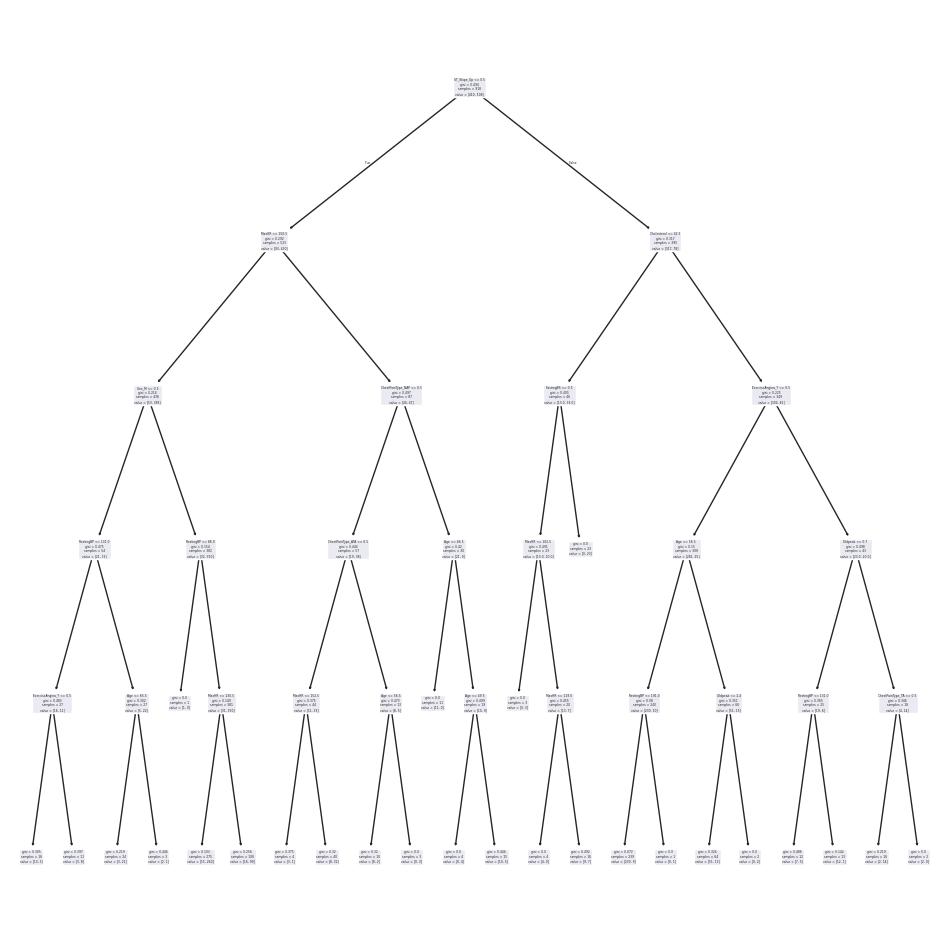

In [163]:
# Graficamos el árbol de decisión

ax = plt.subplots(figsize=(12,12))[1]
plot_tree(
    clf,
    feature_names=feature_names,
    ax=ax
);

Para podar el arbol

In [164]:
validation = skm.ShuffleSplit(
    n_splits=1,
    test_size=0.3, #30 % de los datos para testear?
    random_state=2
)

X_train, X_test, High_train, High_test = skm\
    .train_test_split(
    X,
    High,
    test_size=0.3, #30 % de los datos para testear?
    random_state=0,
    stratify=High
)

results = skm.cross_validate(
    clf,
    D,
    High,
    cv=validation
)

results

{'fit_time': array([0.00521016]),
 'score_time': array([0.00203443]),
 'test_score': array([0.8115942])}

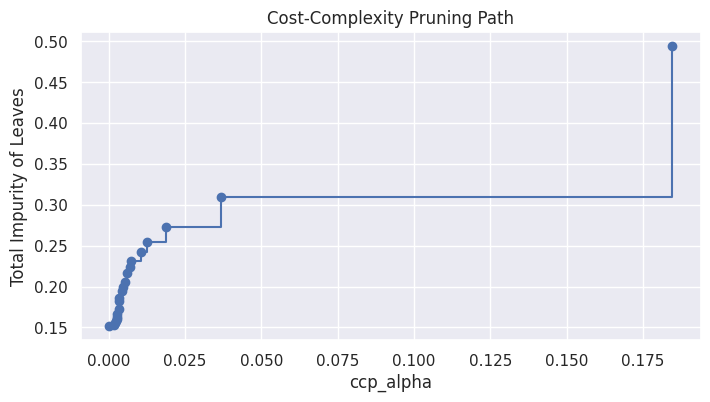

In [165]:
# Sacamos el path de poda del árbol  --- para graficar como va cambiando la impureza del arbol a medida que se aumenta la penalización
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)

ccp_alphas = ccp_path.ccp_alphas #scikit learn para saber que significa cada linea de codigo
impurities = ccp_path.impurities

plt.figure(figsize=(8, 4))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha") # hiperparámetro --> penaliza con cada pregunta que se agrega al arbol (cuando vamos un nodo mas profundo)
plt.ylabel("Total Impurity of Leaves") #nivel de impureza que queda en el arbol por cada penalizacion
plt.title("Cost-Complexity Pruning Path")
plt.grid(True)
plt.show()

# a valores bajos de alfa, el arbol es más complejo (no penaliza tanto) ; a valores altos de alpha, el arbol es más simple pero a la vez más impuro

#en este caso se ve que la impureza no cambia en varios valores posibles de alpha --- esto nos sirve porque nos permite generalizar mejor y evitar overfitting mientras se mantiene la "pureza" del arbol

In [166]:
kfold = skm.KFold( # KFold is a cross-validation technique that divides the dataset into k consecutive folds (subsets). Each fold is used once as a test set while the remaining k-1 folds are used as a training set.
    10,
    random_state=0,   #In summary, this code defines how the training data will be repeatedly split and used to train and evaluate the model during the hyperparameter tuning process.
    shuffle=True
)

grid = skm.GridSearchCV( #busca cual es el mejor alfa
    clf,
    {'ccp_alpha': ccp_path.ccp_alphas},
    refit=True,
    cv=kfold, #estragia para los subconjuntos de train data (kfold de arriba)
    scoring='accuracy'
)


grid.fit(X_train, High_train) #entreno el modelo
print(f"best score: {grid.best_score_}") #print(f"best score: {grid.best_score_}"): After the grid search is complete, grid.best_score_ stores the average score (in this case, accuracy) of the best parameter combination found during the cross-validation. This line prints that best score to the console.

best score: 0.8474999999999999


In [167]:
grid
#DecisionTreeClassifier(ccp_alpha=np.float64(0.003926804366606454), max_depth=5,
#                       random_state=0)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
             param_grid={'ccp_alpha': array([0.        , 0.0015419 , 0.00210929, 0.00226145, 0.00267023,
       0.00271197, 0.00276912, 0.00334883, 0.00345179, 0.00346141,
       0.00433912, 0.00464541, 0.0054239 , 0.00598205, 0.0069805 ,
       0.00715365, 0.01069846, 0.01253169, 0.01871288, 0.03664874,
       0.18463227])},
             scoring='accuracy')

In [168]:
best_.tree_.n_leaves #numero de hojas totales

np.int64(12)

---------
**Ahora sabiendo cuáles son mis hiperparámetros óptimos, entreno nuevamente el modelo**

In [205]:
# Get the best ccp_alpha from the grid search
best_ccp_alpha = grid.best_estimator_.ccp_alpha

# Create a new DecisionTreeClassifier with max_leaf_nodes and the best ccp_alpha
clf_pruned_with_leaves = DTC(
    criterion='gini',
    max_depth=3,
    random_state=0,
    max_leaf_nodes=12, # Example: Set a maximum of 12 leaf nodes (you can change this value)
    ccp_alpha=best_ccp_alpha
)

# Fit the new model (optional if you just want to plot, but good practice)
clf_pruned_with_leaves.fit(X_train, High_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0034517903157570864), max_depth=3,
                       max_leaf_nodes=12, random_state=0)

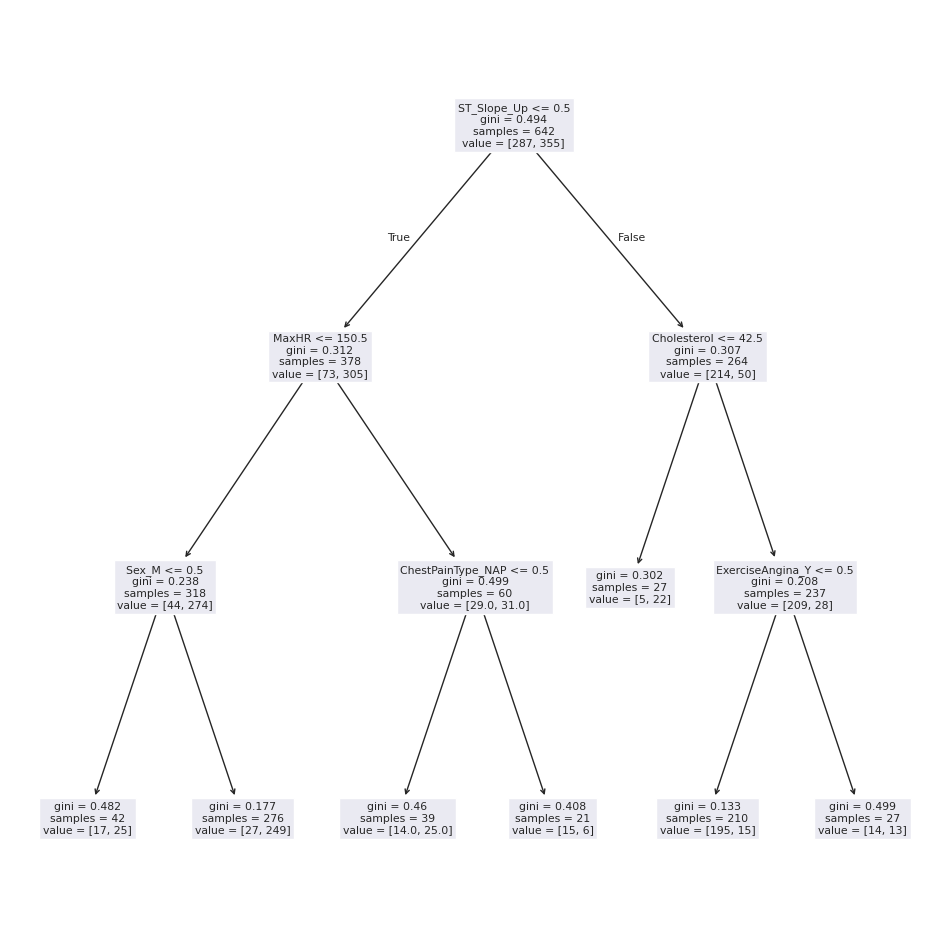

In [206]:
ax = plt.subplots(figsize=(12, 12))[1]
# Use the new model with max_leaf_nodes for plotting
plot_tree(
    clf_pruned_with_leaves,
    feature_names=feature_names,
    ax=ax
);

In [207]:
High_pred = clf_pruned_with_leaves.predict(X_test)

In [208]:
#Reporte completo
print("\nClassification report:\n", classification_report(High_test, High_pred))

# Matriz de confusión
cm = confusion_matrix(High_test, High_pred) #metricas para evaluar como performeo el modelo
cm_labled = pd.DataFrame(cm, index=['Actual : negativos ','Actual : positivos'], columns=['Predicción : negativos','Predict :positivos '])
y_prob= clf_pruned_with_leaves.predict_proba(X_test)[:,1] #predict_proba(X_test_enc) devuelve un array de probabilidades para cada clase de cada ejemplo del conjunto de prueba.


Classification report:
               precision    recall  f1-score   support

          No       0.83      0.82      0.83       123
         Yes       0.86      0.87      0.86       153

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



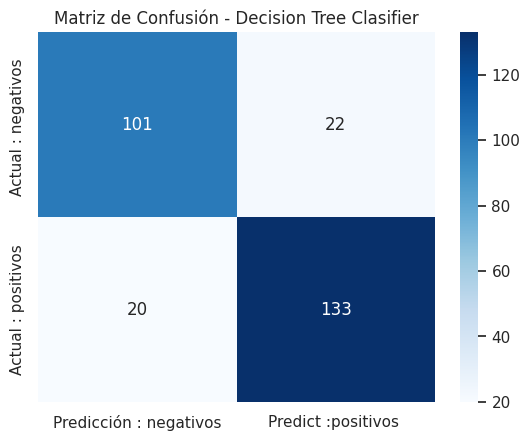

In [209]:
sns.heatmap(cm_labled, annot=True, cmap="Blues", fmt='d')
plt.title("Matriz de Confusión - Decision Tree Clasifier")
plt.show()


In [210]:
# Exactitud (accuracy)
accuracy = accuracy_score(High_test, High_pred)
print("Accuracy:", accuracy_score(High_test, High_pred))

# Precisión, Recall y F1 (para binario o multiclase con promedio)
print("Precision:", precision_score(High_test, High_pred, average="weighted"))
print("Recall:", recall_score(High_test, High_pred, average="weighted"))
print("F1-score:", f1_score(High_test, High_pred, average="weighted"))
print(f"ROC-AUC  : {roc_auc_score(High_test, y_prob):.3f}")
error_rate = round(1-accuracy,4)
print("Error rate:", error_rate)

Accuracy: 0.8478260869565217
Precision: 0.8476568567222653
Recall: 0.8478260869565217
F1-score: 0.8476964945247196
ROC-AUC  : 0.904
Error rate: 0.1522


## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1) #saco target de x

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
def my_XGB_report(X_train, y_train, X_test, y_test, model=None):

    # Entrenar modelo si no se pasa uno ya entrenado
    if model is None:
        model = XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss',
            enable_categorical=True
        )
        model.fit(X_train, y_train)

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    y_prob= model.predict_proba(X_test)[:,1] #predict_proba(X_test_enc) devuelve un array de probabilidades para cada clase de cada ejemplo del conjunto de prueba.

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")
    print("-----------------------------------------")

    return cm_labeled


-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8768
Error_rate  = 0.1232
Precision = 0.88
Recall    = 0.9
f1_score  = 0.89
ROC-AUC  : 0.935
-----------------------------------------


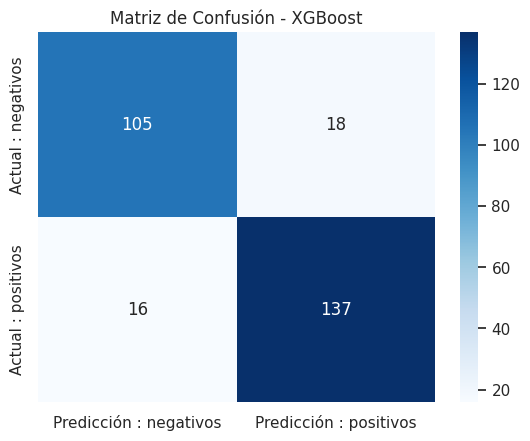

In [ ]:
cm = my_XGB_report(X_train, y_train, X_test, y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matriz de Confusión - XGBoost")
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8804
Error_rate  = 0.1196
Precision = 0.9
Recall    = 0.88
f1_score  = 0.89
ROC-AUC  : 0.942
-----------------------------------------


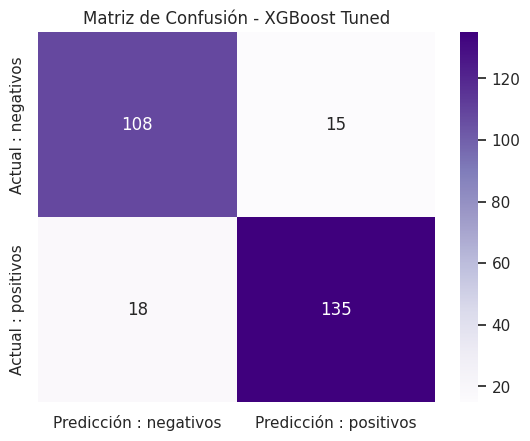

In [ ]:
# Grid de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0] #el porcentaje de columnas para cada arbol (como un randomforest)
}

# Instanciamos el clasificador base
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True
)

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Entrenamiento con los datos
grid_search_xgb.fit(X_train, y_train)

# Mejor modelo
best_xgb_model = grid_search_xgb.best_estimator_

# Reporte
cm_xgb_tuned = my_XGB_report(X_train, y_train, X_test, y_test, model=best_xgb_model)
sns.heatmap(cm_xgb_tuned, annot=True, cmap="Purples", fmt='d')
plt.title("Matriz de Confusión - XGBoost Tuned")
plt.show()


## LightGBM

Supuestamente tiene encoding interno pero no acepta variables tipo "object", asique sigo usando variables con OHE

con variables tipo "category" tambien salta error

In [ ]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1) #saco target de x

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,0,1.382928,-0.832432,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0,0.754157,0.105664,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,0,-1.525138,-0.832432,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,0,-1.132156,0.574711,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,0,-0.581981,-0.832432,True,False,True,False,True,False,False,False,True


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
def my_LGBM_report(X_train, y_train, X_test, y_test, model=None):
    # Entrenar modelo si no se pasa uno ya entrenado
    if model is None:
        model = LGBMClassifier(
            random_state=42,
            verbose=-1
        )
        model.fit(X_train, y_train)

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    y_prob= model.predict_proba(X_test)[:,1] #predict_proba(X_test_enc) devuelve un array de probabilidades para cada clase de cada ejemplo del conjunto de prueba.

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")
    print("-----------------------------------------")

    return cm_labeled

-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8913
Error_rate  = 0.1087
Precision = 0.9
Recall    = 0.9
f1_score  = 0.9
ROC-AUC  : 0.941
-----------------------------------------


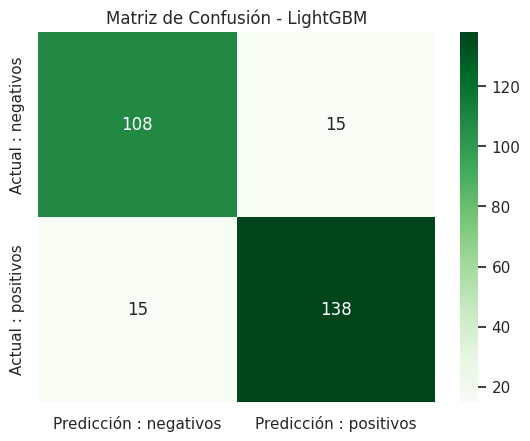

In [ ]:
cm_lgbm = my_LGBM_report(X_train, y_train, X_test, y_test)
sns.heatmap(cm_lgbm, annot=True, cmap="Greens", fmt='d')
plt.title("Matriz de Confusión - LightGBM")
plt.show()

Fitting 3 folds for each of 48 candidates, totalling 144 fits
-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.8949
Error_rate  = 0.1051
Precision = 0.9
Recall    = 0.91
f1_score  = 0.91
ROC-AUC  : 0.942
-----------------------------------------


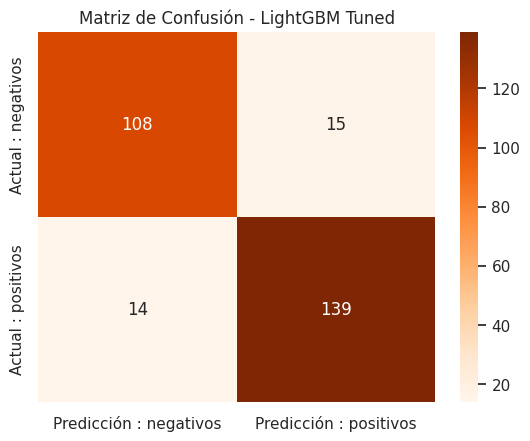

In [ ]:
# Grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [15, 31],
    'min_child_samples': [10, 20]
}

# Instanciamos el clasificador base
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Entrenamos con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Reporte con el mejor modelo
cm_lgbm_tuned = my_LGBM_report(X_train, y_train, X_test, y_test, model=best_model)
sns.heatmap(cm_lgbm_tuned, annot=True, cmap="Oranges", fmt='d')
plt.title("Matriz de Confusión - LightGBM Tuned")
plt.show()


## CATBOOST

In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


Acá no hay dummies por ende el escalado que se hizo anteriormente no sirve (porqe se hizo en X, siendo X = df_dummies).

Lo hago con las variables originales

-----

USO DATA FRAME ESCALADA PERO SIN VARIABLES BOOLEANAS. Con este modelo no hace falta


In [ ]:
df.head() #df original

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
cols_to_scale = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','Age'] #FastingBS sin escalar

# Create a StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
X_scaled_values = scaler.fit_transform(X[cols_to_scale]) #acá estandaricé y transforme las variables [cols_to_scale] -- me devuelve un numpy array

# Create a DataFrame with the scaled values and the correct column names
X_scaled = pd.DataFrame(X_scaled_values, columns=cols_to_scale, index=X.index) #esto es para pasar de numpy (array) a pandas (dataframe)

# Update the original X DataFrame with the scaled values
X[cols_to_scale] = X_scaled

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up


In [ ]:
X.shape #11 variables originales

(918, 11)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
335,0.900464,M,TA,-0.669935,-1.818435,1,LVH,-0.110403,N,-1.582909,Flat
368,0.370100,M,ASY,0.410909,-1.818435,0,Normal,-0.660578,Y,1.043759,Flat
111,0.370100,M,ASY,0.951331,0.514070,0,Normal,-1.760927,Y,1.981855,Flat
336,1.961193,M,NAP,1.491752,-1.818435,0,LVH,-0.896367,N,0.668521,Flat
479,0.264027,M,NAP,2.032174,-1.818435,0,LVH,-0.542683,Y,1.512807,Flat


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
#trata un poco en entrenar (estuvo 3 minutos corriendo)
from catboost import CatBoostClassifier

def my_CatBoost_report(X_train, y_train, X_test, y_test, model=None):

    # Identify categorical feature names from X_train
    categorical_feature_names = X_train.select_dtypes(include='object').columns.tolist()


    if model is None:
        model = CatBoostClassifier(
            random_seed=42,
            verbose=0,                 # Silencia la salida
            # cat_features=categorical_columns # Original line
            cat_features=categorical_feature_names # Pass the list of categorical feature names

        )
        model.fit(X_train, y_train, cat_features=categorical_feature_names) # Pass the list here too

    # Predicción
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)
    y_prob= model.predict_proba(X_test)[:,1]

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print(f"ROC-AUC  : {roc_auc_score(y_test, y_prob):.3f}")
    print("-----------------------------------------")

    return cm_labeled

-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.913
Error_rate  = 0.087
Precision = 0.91
Recall    = 0.93
f1_score  = 0.92
ROC-AUC  : 0.939
-----------------------------------------


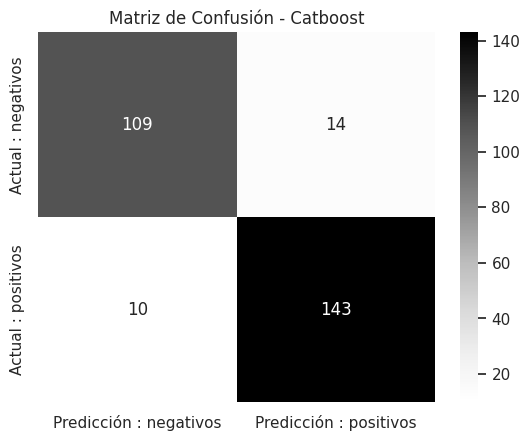

In [ ]:
cm_lgbm = my_CatBoost_report(X_train, y_train, X_test, y_test)
sns.heatmap(cm_lgbm, annot=True, cmap="Grays", fmt='d')
plt.title("Matriz de Confusión - Catboost")
plt.show()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,target
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Fitting 3 folds for each of 36 candidates, totalling 108 fits
-----------------------------------------
Dataset
Tamaño train: 642
Tamaño test: 276
Porcentaje de positivos: 55.30%
-----------------------------------------
Resultados
Accuracy  = 0.9022
Error_rate  = 0.0978
Precision = 0.91
Recall    = 0.92
f1_score  = 0.91
ROC-AUC  : 0.940
-----------------------------------------


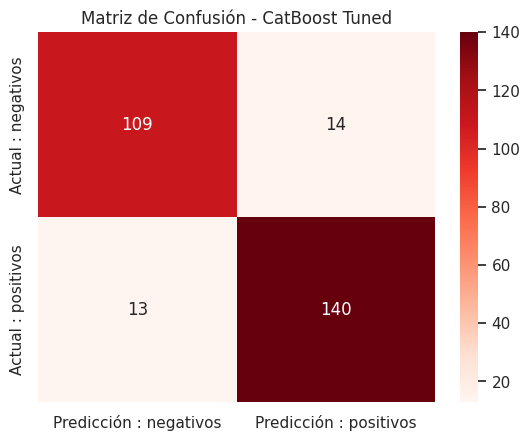

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Grid de hiperparámetros
param_grid_catboost = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [1, 3, 5]
}

categorical_columns= df.select_dtypes(include="object").columns.tolist() #lista de los nombres de las variables categoricas

# Modelo base
cat_model = CatBoostClassifier(
    random_seed=42,
    verbose=0,
    cat_features=categorical_columns
)

# GridSearch
grid_search_catboost = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid_catboost,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

# Entrenamiento
grid_search_catboost.fit(X_train, y_train)

# Mejor modelo
best_cat_model = grid_search_catboost.best_estimator_

# Reporte final
cm_catboost_tuned = my_CatBoost_report(X_train, y_train, X_test, y_test, model=best_cat_model)
sns.heatmap(cm_catboost_tuned, annot=True, cmap="Reds", fmt='d')
plt.title("Matriz de Confusión - CatBoost Tuned")
plt.show()


In [ ]:
print(best_cat_model )